In [1]:
import os

os.chdir('../')

import tensorflow as tf
import numpy as np

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from neural_network.data import load_mnist, encode_labels


gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1)
s = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [2]:
def encode_labels(y, k):
    """
    function convert labels to one hot vector
    """
    onehot = np.zeros((y.shape[0], k))
    for idx, val in enumerate(y):
        onehot[idx, val] = 1.0
    return onehot

# set random seed
np.random.seed(137)
# load mnist data
train_inputs, train_targets = load_mnist('neural_network/data/', kind='train')
test_inputs, test_targets = load_mnist('neural_network/data/', kind='t10k')
# normalize input values using min max scaler style
train_inputs_normalized = train_inputs / 255.
test_inputs_normalized = test_inputs / 255.
# one hot encoding labels
train_targets_enc = encode_labels(train_targets, 10)

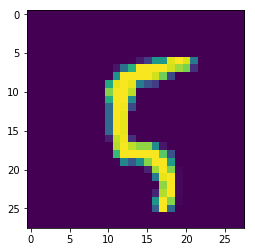

In [3]:
plt.imshow(train_inputs_normalized[100, :].reshape((28, 28)))

In [4]:
input_X = tf.placeholder('float64', [None, 784], name='X')
input_y = tf.placeholder('float64', [None, 10], name='y')

# inputs and shareds
weights_1 = tf.Variable(dtype='float64', initial_value=np.random.randn(784, 32), name='weights_1')
weights_2 = tf.Variable(dtype='float64', initial_value=np.random.randn(32, 10), name='weights_2')

b_1 = tf.Variable(dtype='float64', initial_value=np.random.randn(1, 32), name='b_1')
b_2 = tf.Variable(dtype='float64', initial_value=np.random.randn(1, 10), name='b_2')

def forward(input_X):
    fc1 = tf.matmul(input_X, weights_1) + b_1
    relu1 = tf.nn.relu(fc1)
    fc2 = tf.matmul(relu1, weights_2) + b_2
    return fc2

def predict_function(inputs):
    predicted = tf.argmax(forward(tf.cast(inputs, 'float64')), axis=1)
    return predicted

pred = forward(input_X)
loss = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits_v2(labels=input_y, logits=pred))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [5]:
s.run(tf.global_variables_initializer())

# set batch size
batch_size = 16

for i in range(10):
    
    sum_loss = 0
    for ind in range(0, train_inputs_normalized.shape[0] - batch_size, batch_size):
        
        batch_xs = train_inputs_normalized[ind:ind + batch_size, :]
        batch_ys = train_targets_enc[ind:ind + batch_size, :]
    
        _, loss_i = s.run(
            [optimizer, loss],
            feed_dict={input_X: batch_xs, input_y: batch_ys}
        )
        sum_loss += loss_i
    
    accuracy_test = accuracy_score(
        test_targets,
        predict_function(test_inputs_normalized).eval()
    )
    
    print("epoch {:2d} loss {:.4f} test auc: {:.4f}".format(i, sum_loss, accuracy_test))

epoch  0 loss 10224.6706 test auc: 0.6763
epoch  1 loss 3573.3217 test auc: 0.7227
epoch  2 loss 2928.6623 test auc: 0.7527
epoch  3 loss 2569.3371 test auc: 0.7763
epoch  4 loss 2325.2959 test auc: 0.7942
epoch  5 loss 2154.9757 test auc: 0.8079
epoch  6 loss 2030.0624 test auc: 0.8184
epoch  7 loss 1932.4990 test auc: 0.8254
epoch  8 loss 1852.6206 test auc: 0.8337
epoch  9 loss 1785.4206 test auc: 0.8401
